## Librerías usadas

En este cuaderno usaremos ``numpy`` y ``matplotlib``. Esta celda importa estos paquetes y define que la salida de las gráficas se muestre en el cuaderno al correr la celda.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
%matplotlib inline

## Regresión lineal por mínimos cuadrados
$$
\newcommand{\pas}[1]{\left[ #1 \right]}
\newcommand{\pap}[1]{\left( #1 \right)}
\newcommand{\pac}[1]{\left\{ #1 \right\}}
\newcommand{\pav}[1]{\left\vert #1 \right\vert}
\newcommand{\paV}[1]{\left\Vert #1 \right\Vert}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Am}{\mathbb{A}}
\newcommand{\ups}{\upsilon}
\newcommand{\eps}{\varepsilon}
\newcommand{\pr}{\partial}
$$

### Requisitos matemáticos

Para entender el método que se explica a continuación se requiere entender la notación vectorial en $\mathbb{R}^N$ y el producto interior euclideano tradicional en dicho espacio vectorial, es decir, un poco de **álgebra lineal**. Además, se deben tener conocimiento de cómo buscar el mínimo de una función real de dos variables reales, es decir, un poco de **cálculo multivariable**. También sería útil entender los conceptos estadísticos de **varianza**, **covarianza** y **promedio**.

### Explicación del método
Supongamos que se tienen dos vectores de $N$ puntos $\xb=\{x_0,x_1,\ldots,x_{N-1}\}$ y $\yb=\{y_0,y_1,\ldots,y_{N-1}\}$. Note que se está usando la notación tradicional de índices de **Python**, en la cual se comienza con el cero. Estos datos pueden ser los resultados de un experimento o una observación y se espera por razones teóricas que las dos variables deberían dependener linealmente, es decir, estos puntos deberían expresar una dependencia $y=f(x)=mx+b$. Sin embargo, por errores aleatorios típicos del proceso de tomar datos, los puntos observados no se encuentran totalmente en una línea recta, pero sí están más o menos alrededor una tendencia lineal. 

Se quiere estimar una función lineal que aproxime bastante bien estos puntos experimentales. Para  tal efecto, el método más tradicional es buscar la función lineal $f(x)$ que minimice la siguiente función:
$$
\
\eps(m,b)=\sum_{i=0}^{N-1}\pap{f(x_i)-y_i}^2=\sum_{i=0}^{N-1}\pap{mx_i+b-y_i}^2=m^2 \pap{\sum_{i=0}^{N-1} x_i^2}+2bm \pap{\sum_{i=0}^{N-1} x_i} -2b \pap{\sum_{i=0}^{N-1} y_i}-2 m \pap{\sum_{i=0}^{N-1} x_i y_i}+\sum_{i=0}^{N-1} y_i^2+N b^2 \, .
\tag{1}
\
$$
Esta función es la suma de los cuadrados de las diferencias $d_i=f(x_i)-y_i$ (de ahí el nombre de **_mínimos cuadrados_** del método) y estima el error de la aproximación lineal. En métodos de aproximación, a los diferencias $d_i$ se les conoce como **residuales**. 

Para minimizar la función de error $\eps(m,b)$, esta se puede expresar de una forma mucho más compacta usando notación vectorial:
$$
\
\eps(m,b)=\xb^2 m^2+2 \xb\cdot \ub b m + N b^2-2\xb \cdot \yb m-2 \yb\cdot\ub b+\yb^2\, ,
\tag{2}
\
$$
donde $\ub=\{1,1,\ldots,1\}$ es un vector compuesto enteramente por unos. La minimización ocurre cuando:
$$
\begin{align}
\frac{\pr \eps}{\pr m} & =2 \xb^2 m-2 \xb\cdot \yb+2 \xb\cdot \ub b=0 \, ,
\tag{3}
\\
\frac{\pr \eps}{\pr b} & =2 N b-2 \yb\cdot \ub+2 \xb\cdot \ub m =0 \, .
\tag{4}
\end{align}
$$
La solución a estas ecuaciones es,
$$
\begin{align}
m=\frac{\xb\cdot \yb-\frac{\pap{\xb\cdot \ub}\pap{\yb\cdot \ub}}{N}}{\xb^2-\frac{\pap{\xb\cdot \ub}^2}{N}}\, ,
\tag{5}
\\
b=\frac{1}{N}\pap{\yb\cdot \ub-\xb\cdot \ub m}\, .
\tag{6}
\end{align}
$$
Las ecuaciones (5) y (6) se pueden escribir mediante los conceptos estadísticos de **varianza**, **covarianza** y **promedio**. En este caso:
$$
\begin{align}
m=\frac{\sigma_{xy}}{\sigma^2} ,
\tag{7}
\\
b=\mu_y-m\mu_x\, ,
\tag{8}
\end{align}
$$
donde $\sigma_{xy}$ es la covarianza entre $\xb$ y $\yb$, $\sigma^2$ es la varianza de $\xb$, $\mu_x,\mu_y$ son los promedios $\xb$ y $\yb$ de respectivamente.

### Implementación computacional

En la siguiente pieza de código se genera un vector $\yb$ aleatorio para un $\xb$ y se hace la regresión lineal. Luego se grafican los resultados. Nótese como la recta pasa bastante bien alrededor del centro de los datos.

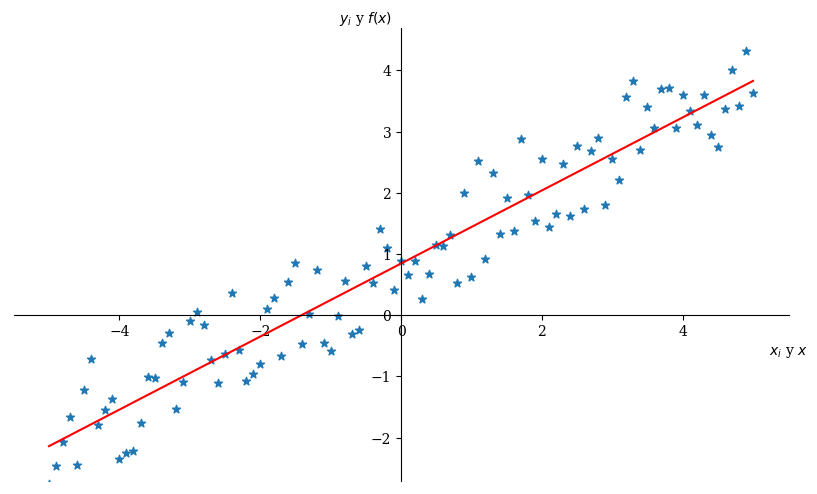

In [4]:
Np=101
# Se genera un vector x uniformemente espaciado
xvec=np.linspace(-5,5,Np)
# Se genera un vector y aleatorio (pero con tendencias lineales)
yvec=np.linspace(-2,4,Np)+2*(nmp.random.rand(Np)-0.5)
# Se genera el vector de unos
uvec=np.ones(Np)

#Se calculan los productos de vectores necesarios y se normalizan para aplicar las fórmulas (5) y (6) 
Nsqr=math.sqrt(Np)
xx=np.dot(xvec,xvec)
xu=np.dot(xvec,uvec)/Nsqr
yu=np.dot(yvec,uvec)/Nsqr
xy=np.dot(xvec,yvec)
#Se aplican las fórmulas (5) y (6)
m=(xy-xu*yu)/(xx-xu*xu)
b=(yu-xu*m)/Nsqr

#Se usan los parámetros hallados para hallar la recta de regresión
yvec1=m*xvec+b


#Se grafican los resultados
plt.figure(figsize=(10,6),dpi=100)
plt.scatter(xvec,yvec,marker="*")
plt.plot(xvec,yvec1,color="red")
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.ylim(-2.7,4.7)
plt.ylabel("$y_i$ y $f(x)$",position=(0,1),rotation='horizontal')
plt.xlabel("$x_i$ y $x$",position=(1,0))
plt.show()